In [1]:
#Install dependencies if running in a new environment
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Geodemographic python example
This notebook contains the workflow for produceding a geodemographic classification in python using k-means clustering. It follows a simplified process, similar to that described in the [2021 OAC Paper](https://rgs-ibg.onlinelibrary.wiley.com/doi/full/10.1111/geoj.12550).

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from clustergram import Clustergram
import matplotlib.pyplot as plt
import os
#set a  random seed for reproducibility
random_seed = 507


#create outputs and plots directories if they do not exist

OUTPUT_DIR = "outputs"
PLOT_DIR = "plots"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)

#load the input data from a csv file 
# The names of the columns are not important, BUT;
# the first column should be the geography code (e.g., Output Area or Local Authority District),
# which will be used as the DataFrame index.
# The remaining columns should be variables for clustering, provided as fractions or percentages of the table total.
def load_data(filepath):
    input_df = pd.read_csv(filepath, index_col=0)
    
    # Check for missing values
    missing_values = input_df.isnull().sum().sum()
    if missing_values > 0:
        print(f"Warning: {missing_values} missing values found in input data. Missing values will be replaced with 0.")
        input_df.fillna(0, inplace=True)
    
    return input_df

# File path to the dataset
inputdata_filepath = "example_oacdata.csv"

# Load the dataset
variable_df = load_data(inputdata_filepath)
#show first 5 rows of the dataset
variable_df.head()

,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
geo_code,,,,,,,,,,,,,,,,,,,,,
geo_00001,0,71,90,55,59,59,82,87,45,13,...,53,41,49,45,50,53,32,73,67,87
geo_00002,0,78,83,74,67,66,81,97,45,32,...,49,67,65,55,52,64,41,86,70,69
geo_00003,65,94,63,51,79,61,63,92,62,41,...,48,50,42,52,45,67,43,65,88,78
geo_00004,0,79,82,73,75,81,76,100,24,0,...,58,60,58,38,57,62,30,82,70,75
geo_00005,43,70,78,77,87,69,55,98,43,0,...,50,52,63,60,60,58,33,82,67,72


In [7]:
def transform_and_standardize_data(df):
    """Apply inverse hyperbolic sine transform, to account for non-normality
      and then range standardize using min-max scaling to the dataframe."""
    df = np.arcsinh(df)
    df = (df - df.min()) / (df.max() - df.min())
    return df

# Transform the input data
transformed_variable_df = transform_and_standardize_data(variable_df)
transformed_variable_df.head()


,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60
geo_code,,,,,,,,,,,,,,,,,,,,,
geo_00001,0.000000,0.935364,0.981978,0.888862,0.902136,0.900424,0.962547,0.856059,0.849310,0.617561,...,0.880186,0.831745,0.865379,0.849310,0.869191,0.880186,0.784986,0.944206,0.924420,0.973717
geo_00002,0.000000,0.953109,0.966668,0.944966,0.926177,0.921582,0.960231,0.968517,0.849310,0.787991,...,0.865379,0.924420,0.918701,0.887176,0.876592,0.915775,0.831745,0.975254,0.932687,0.929971
geo_00003,0.918701,0.988322,0.914538,0.874586,0.957329,0.906715,0.912803,0.913816,0.909784,0.834928,...,0.861488,0.869191,0.836291,0.876592,0.849310,0.924420,0.840731,0.922217,0.975874,0.953109
geo_00004,0.000000,0.955513,0.964376,0.942394,0.947504,0.960231,0.948207,1.000000,0.730726,0.000000,...,0.897198,0.903596,0.897198,0.817408,0.893916,0.909784,0.772812,0.966231,0.932687,0.945707
geo_00005,0.840731,0.932687,0.954920,0.952480,0.975568,0.929971,0.887176,0.979118,0.840731,0.000000,...,0.869191,0.876592,0.912803,0.903596,0.903596,0.897198,0.790792,0.966231,0.924420,0.938003


# Clustergrams
We produce a clustergram plot to assess an appropriate number of clusters for the supergroups.
For OAC, eight supergroups were created.
Some guidance on interpreting clustergrams and choosing the number of clusters can be found here: [Clustergram](https://clustergram.readthedocs.io/en/stable/notebooks/introduction.html)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.267 seconds.
K=3 fitted in 0.307 seconds.
K=4 fitted in 0.381 seconds.
K=5 fitted in 0.417 seconds.
K=6 fitted in 0.292 seconds.
K=7 fitted in 0.487 seconds.
K=8 fitted in 0.428 seconds.
K=9 fitted in 0.594 seconds.
K=10 fitted in 0.493 seconds.
K=11 fitted in 0.718 seconds.
K=12 fitted in 0.488 seconds.
K=13 fitted in 0.490 seconds.
K=14 fitted in 0.579 seconds.


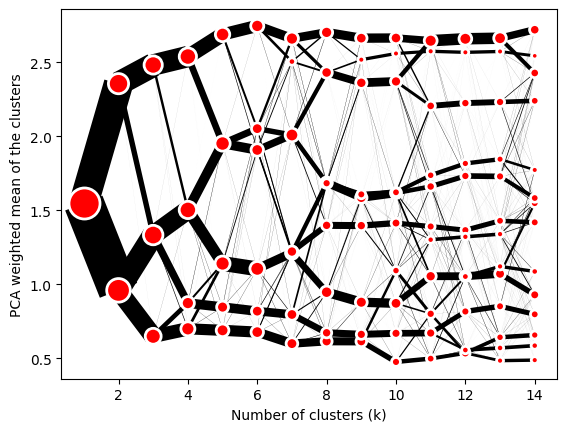

In [8]:

def create_clustergram(df, n_init, save_loc, random_seed=random_seed):
    """
    Create and save a clustergram for evaluating k-means clustering solutions.

    The clustergram visualizes clustering stability and helps identify the optimal 
    number of clusters by performed the k-means algorithm for a range of cluster
    numbers.
    Since k-means is sensitive to initialization, `n_init` determines the number of 
    times the algorithm runs with different centroid seeds. The final result is the 
    best outcome based on inertia/WCSS (within-cluster sum of squares.

    Parameters:
    df (pd.DataFrame or np.ndarray): The input data for clustering.
    n_init (int): Number of k-means runs with different initial centroid seeds. 
                  Higher values (e.g., ~1000) improve solution stability but increase runtime.
    save_loc (str): File path to save the clustergram plot.
    random_seed (int, optional): Random seed for reproducibility.
    """
    cgram = Clustergram(range(1, 15), n_init=n_init, random_state=random_seed)  # Initialize clustergram model
    cgram.fit(df)  # Fit model to data
    cgram.plot()  # Generate plot
    plt.savefig(save_loc)  # Save figure
    plt.show()  # Display plot

# Example usage
n_init = 10  # Use a low value for quick testing, increase (~100) for final results
create_clustergram(transformed_variable_df, n_init, save_loc=PLOT_DIR+"/supergroup_clustergram.png")


In [10]:
def run_kmeans(input_df, num_clusters, n_init, output_filepath, random_seed=None):
    """
    Run K-means clustering on the input dataset and save the cluster assignments.

    This function applies K-means clustering to the provided dataset, assigns cluster 
    labels to each row, and saves the cluster assignments as a lookup table.

    Parameters:
    input_df (pd.DataFrame): The input dataset to be clustered.
    num_clusters (int): The number of clusters (K) to create.
    n_init (int): Number of times the K-means algorithm runs with different initial 
                  centroid seeds. The best result based on inertia/WCSS is chosen. 
                  A higher value (e.g., ~1000) is recommended for final results, 
                  but a lower value can be used for testing.
    output_filepath (str): Path to save the resulting cluster assignments.
    random_seed (int, optional): Random seed for reproducibility.

    Returns:
    pd.DataFrame: The input DataFrame with an added 'cluster' column containing 
                  the assigned cluster for each row.
    """
    df = input_df.copy()
    # Initialize the K-means model
    kmeans_model = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=random_seed, n_init=n_init)
    
    # Fit the model and assign clusters
    df['cluster'] = kmeans_model.fit_predict(df)

    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

    # Save the cluster assignments to a CSV file
    df[['cluster']].to_csv(output_filepath)

    # Show the first few rows of the assigned clusters
    print(f"K-means clusters:\n{df[['cluster']].head()}")

    return df

# Define the number of clusters (K). Choose K based on the clustergram plot.
num_clusters = 8  
output_filepath = OUTPUT_DIR+"/supergroups_clusteroutput.csv"

# Run K-means clustering
supergrouped_variable_df = run_kmeans(transformed_variable_df, num_clusters, n_init=1, output_filepath = output_filepath, random_seed=random_seed)

#supregrouped_variable_df contains the cluster assignments for each row in the input data, and the input data itself.
supergrouped_variable_df.head()


K-means clusters:
           cluster
geo_code          
geo_00001        3
geo_00002        3
geo_00003        4
geo_00004        2
geo_00005        0


,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,...,v52,v53,v54,v55,v56,v57,v58,v59,v60,cluster
geo_code,,,,,,,,,,,,,,,,,,,,,
geo_00001,0.000000,0.935364,0.981978,0.888862,0.902136,0.900424,0.962547,0.856059,0.849310,0.617561,...,0.831745,0.865379,0.849310,0.869191,0.880186,0.784986,0.944206,0.924420,0.973717,3
geo_00002,0.000000,0.953109,0.966668,0.944966,0.926177,0.921582,0.960231,0.968517,0.849310,0.787991,...,0.924420,0.918701,0.887176,0.876592,0.915775,0.831745,0.975254,0.932687,0.929971,3
geo_00003,0.918701,0.988322,0.914538,0.874586,0.957329,0.906715,0.912803,0.913816,0.909784,0.834928,...,0.869191,0.836291,0.876592,0.849310,0.924420,0.840731,0.922217,0.975874,0.953109,4
geo_00004,0.000000,0.955513,0.964376,0.942394,0.947504,0.960231,0.948207,1.000000,0.730726,0.000000,...,0.903596,0.897198,0.817408,0.893916,0.909784,0.772812,0.966231,0.932687,0.945707,2
geo_00005,0.840731,0.932687,0.954920,0.952480,0.975568,0.929971,0.887176,0.979118,0.840731,0.000000,...,0.876592,0.912803,0.903596,0.903596,0.897198,0.790792,0.966231,0.924420,0.938003,0


# Subgroups
For OAC the supergroup clusters created above are split further into groups and subgroups by applying the above process iteratively. 
Example code for creating the first layer of subclusters (groups) is below

Cluster: 0, 13644 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster0.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.157 seconds.
K=3 fitted in 0.195 seconds.
K=4 fitted in 0.175 seconds.
K=5 fitted in 0.150 seconds.
K=6 fitted in 0.154 seconds.
K=7 fitted in 0.134 seconds.
K=8 fitted in 0.150 seconds.
K=9 fitted in 0.179 seconds.
K=10 fitted in 0.147 seconds.
K=11 fitted in 0.182 seconds.
K=12 fitted in 0.192 seconds.
K=13 fitted in 0.152 seconds.
K=14 fitted in 0.173 seconds.


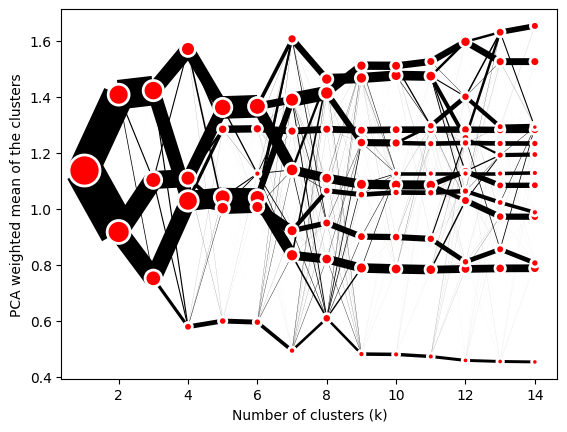

Cluster: 1, 12494 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster1.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.145 seconds.
K=3 fitted in 0.149 seconds.
K=4 fitted in 0.162 seconds.
K=5 fitted in 0.134 seconds.
K=6 fitted in 0.143 seconds.
K=7 fitted in 0.146 seconds.
K=8 fitted in 0.158 seconds.
K=9 fitted in 0.147 seconds.
K=10 fitted in 0.128 seconds.
K=11 fitted in 0.146 seconds.
K=12 fitted in 0.130 seconds.
K=13 fitted in 0.185 seconds.
K=14 fitted in 0.163 seconds.


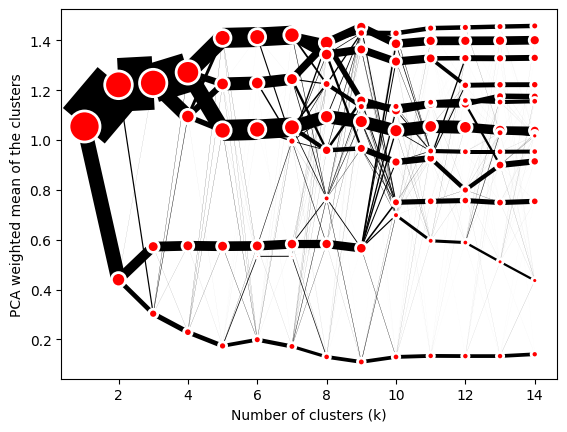

Cluster: 2, 10732 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster2.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.153 seconds.
K=3 fitted in 0.132 seconds.
K=4 fitted in 0.164 seconds.
K=5 fitted in 0.157 seconds.
K=6 fitted in 0.141 seconds.
K=7 fitted in 0.148 seconds.
K=8 fitted in 0.155 seconds.
K=9 fitted in 0.161 seconds.
K=10 fitted in 0.137 seconds.
K=11 fitted in 0.151 seconds.
K=12 fitted in 0.154 seconds.
K=13 fitted in 0.166 seconds.
K=14 fitted in 0.166 seconds.


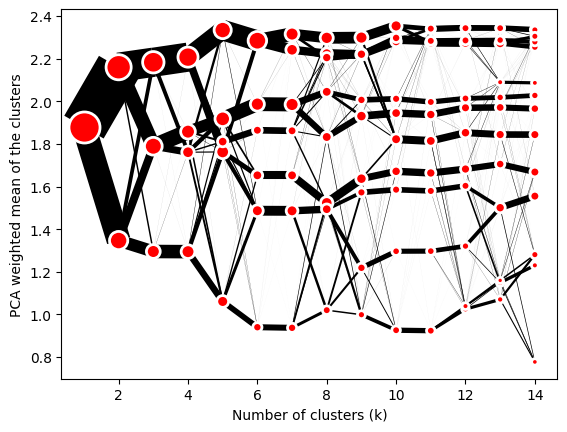

Cluster: 3, 15011 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster3.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.175 seconds.
K=3 fitted in 0.147 seconds.
K=4 fitted in 0.130 seconds.
K=5 fitted in 0.158 seconds.
K=6 fitted in 0.180 seconds.
K=7 fitted in 0.153 seconds.
K=8 fitted in 0.161 seconds.
K=9 fitted in 0.165 seconds.
K=10 fitted in 0.246 seconds.
K=11 fitted in 0.203 seconds.
K=12 fitted in 0.194 seconds.
K=13 fitted in 0.255 seconds.
K=14 fitted in 0.178 seconds.


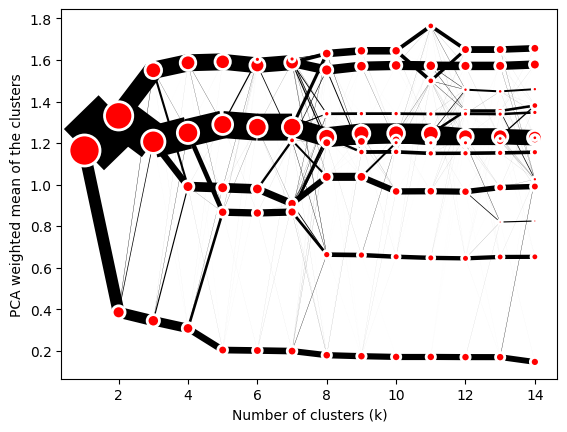

Cluster: 4, 13373 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster4.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.150 seconds.
K=3 fitted in 0.143 seconds.
K=4 fitted in 0.140 seconds.
K=5 fitted in 0.142 seconds.
K=6 fitted in 0.154 seconds.
K=7 fitted in 0.143 seconds.
K=8 fitted in 0.148 seconds.
K=9 fitted in 0.141 seconds.
K=10 fitted in 0.186 seconds.
K=11 fitted in 0.155 seconds.
K=12 fitted in 0.153 seconds.
K=13 fitted in 0.171 seconds.
K=14 fitted in 0.143 seconds.


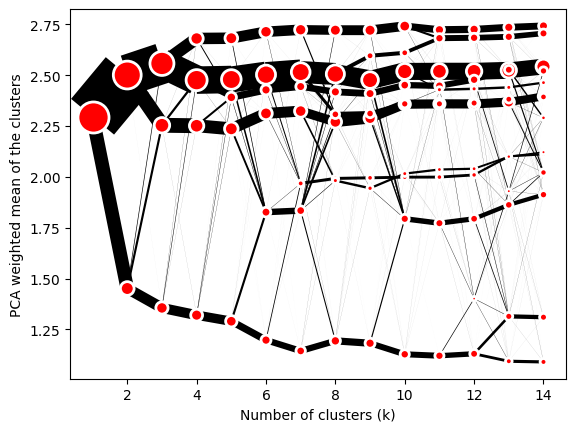

Cluster: 5, 15653 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster5.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.138 seconds.
K=3 fitted in 0.185 seconds.
K=4 fitted in -1.828 seconds.
K=5 fitted in 0.141 seconds.
K=6 fitted in 0.136 seconds.
K=7 fitted in 0.174 seconds.
K=8 fitted in 0.154 seconds.
K=9 fitted in 0.207 seconds.
K=10 fitted in 0.151 seconds.
K=11 fitted in 0.211 seconds.
K=12 fitted in 0.180 seconds.
K=13 fitted in 0.183 seconds.
K=14 fitted in 0.231 seconds.


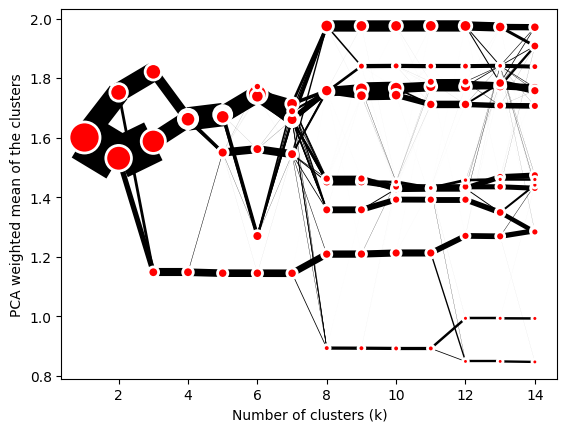

Cluster: 6, 8381 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster6.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.127 seconds.
K=3 fitted in 0.129 seconds.
K=4 fitted in 0.124 seconds.
K=5 fitted in 0.163 seconds.
K=6 fitted in 0.132 seconds.
K=7 fitted in 0.176 seconds.
K=8 fitted in 0.129 seconds.
K=9 fitted in 0.153 seconds.
K=10 fitted in 0.181 seconds.
K=11 fitted in 0.150 seconds.
K=12 fitted in 0.161 seconds.
K=13 fitted in 0.167 seconds.
K=14 fitted in 0.144 seconds.


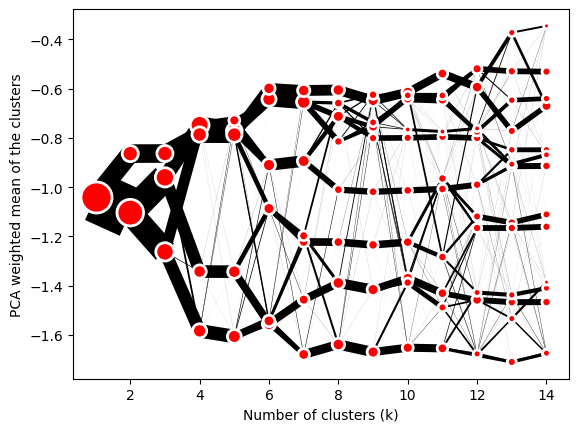

Cluster: 7, 10712 geographies in cluster
Saving clustergram to plots/subcluster_clustergram_cluster7.png
K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.141 seconds.
K=3 fitted in 0.162 seconds.
K=4 fitted in 0.135 seconds.
K=5 fitted in 0.154 seconds.
K=6 fitted in 0.158 seconds.
K=7 fitted in 0.166 seconds.
K=8 fitted in 0.185 seconds.
K=9 fitted in 0.160 seconds.
K=10 fitted in 0.164 seconds.
K=11 fitted in 0.178 seconds.
K=12 fitted in 0.171 seconds.
K=13 fitted in 0.184 seconds.
K=14 fitted in 0.146 seconds.


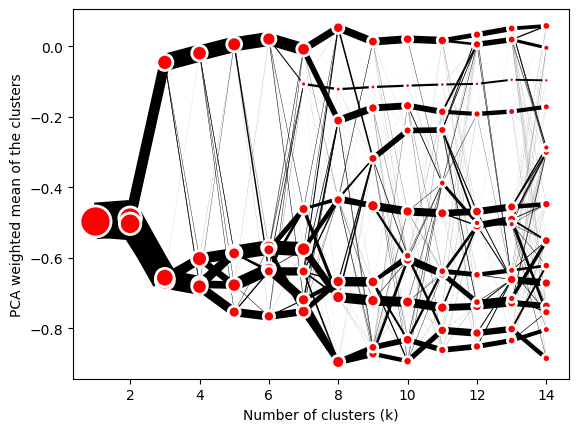

In [ ]:
def create_subcluster_clustergrams(output_df, num_clusters, n_init=10):
    """
    Generate and save clustergrams for each supercluster.
    This function loops through the existing clusters and creates a clustergram 
    for each
    Parameters:
    output_df (pd.DataFrame): DataFrame containing cluster assignments.
    num_clusters (int): The total number of clusters to iterate over.
    n_init (int, optional): The number of times KMeans will be initialized. Defaults to 10. Increase for more stable results.
                            

    """

    for cluster in range(num_clusters):
        # Select rows corresponding to the current cluster, dropping the 'cluster' column
        cluster_df = output_df.query(f"cluster == {cluster}").drop(columns='cluster')

        print(f"Cluster: {cluster}, {len(cluster_df)} geographies in cluster")

        # Define save location
        save_loc = os.path.join(PLOT_DIR, f"subcluster_clustergram_cluster{cluster}.png")
        print(f"Saving clustergram to {save_loc}")

        # Generate clustergram
        create_clustergram(cluster_df, n_init=n_init, save_loc=save_loc)

# Example usage
create_subcluster_clustergrams(supergrouped_variable_df, num_clusters, n_init=10)



In [ ]:

def run_subclustering(input_df: pd.DataFrame, subcluster_nums: list, num_clusters: int, n_init: int = 100) -> pd.DataFrame:
    """
    Runs subclustering for each supergroup using KMeans and returns a modified DataFrame with subcluster labels.
    
    Parameters:
    - output_df (pd.DataFrame): The original DataFrame containing data and cluster assignments.
    - subcluster_nums (list): A list specifying the number of subclusters to split each supergroup into.
    - num_clusters (int): The total number of supergroups.
    - n_init (int, optional): The number of times KMeans will be initialized. Defaults to 100. Increase for more stable results.

    Returns:
    - pd.DataFrame: A new the output dataFrame with an added 'subcluster' column.
    """

    #create a directory to save the subcluster outputs
    os.makedirs(OUTPUT_DIR+"/subclusters", exist_ok=True)

    if len(subcluster_nums) != num_clusters:
        raise ValueError(f"Length of subcluster_nums ({len(subcluster_nums)}) does not match num_clusters ({num_clusters}).")

    # Work on a copy of the DataFrame to prevent unintended modifications
    df = input_df.copy()


    for cluster, num_subclusters in zip(range(num_clusters), subcluster_nums): # Iterate over each supergroup
        print(f"Clustering supergroup {cluster} into {num_subclusters} subclusters.")

        # Select rows corresponding to the current cluster, drop the cluster column before clustering
        cluster_df = input_df.query(f"cluster == {cluster}").drop(columns='cluster').copy()
        # Run KMeans clustering for the selected supergroup
        subcluster_output_df = run_kmeans(
            cluster_df, 
            num_subclusters, 
            n_init=n_init, 
            output_filepath=OUTPUT_DIR+f"/subclusters/supergroup{cluster}_subclusteroutput.csv"
        )

        # Convert subcluster nums 0,1,2,... to a, b, c, ...
        subcluster_output_df['subcluster'] = [str(cluster) + chr(97 + i) for i in subcluster_output_df['cluster']]

        # Update the modified DataFrame with subclustering results
        df.loc[cluster_df.index, 'subcluster'] = subcluster_output_df['subcluster']

    # Save the final output
    df[["subcluster"]].to_csv(OUTPUT_DIR+"/subgroups_clusteroutput.csv")
    print("Final output saved to outputs/subgroups_clusteroutput.csv")

    return df  # Return the modified DataFrame with clusters and subclusters



# We can now select the number of subclusters to split each of the supergroups into using the clustergrams above.
# For this example, we choose three subclusters for each supergroup.
# The length of the list must match num_clusters (the number of supergroups).
subcluster_nums = [3, 3, 3, 3, 3, 3, 3, 3]
# subcluster_nums = [2, 4, 2, 2, 5, 2, 3, 3]

#num clusters is the number of supergroups (set earlier)
#n_init is the number of times the KMeans algorithm will be initialized (as before)

subgrouped_variable_df = run_subclustering(supergrouped_variable_df, subcluster_nums, num_clusters=num_clusters, n_init=10)


Clustering supergroup 0 into 3 subclusters.
K-means clusters:
           cluster
geo_code          
geo_00005        1
geo_00007        0
geo_00010        2
geo_00030        2
geo_00051        2
Clustering supergroup 1 into 3 subclusters.
K-means clusters:
           cluster
geo_code          
geo_00006        0
geo_00011        1
geo_00014        0
geo_00025        1
geo_00027        0
Clustering supergroup 2 into 3 subclusters.
K-means clusters:
           cluster
geo_code          
geo_00004        2
geo_00008        1
geo_00009        2
geo_00017        1
geo_00028        0
Clustering supergroup 3 into 3 subclusters.
K-means clusters:
           cluster
geo_code          
geo_00001        0
geo_00002        0
geo_00016        0
geo_00018        0
geo_00024        1
Clustering supergroup 4 into 3 subclusters.
K-means clusters:
           cluster
geo_code          
geo_00003        0
geo_00022        0
geo_00031        0
geo_00032        2
geo_00035        0
Clustering supergroup 5 i